In [1]:
import geopandas as gpd

# 1.简单示例：

### 读取数据：

In [2]:
world = gpd.read_file('./datasets/naturalearth_lowres/naturalearth_lowres.shp')
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
171,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
172,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
173,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
174,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [3]:
world = world[['continent', 'geometry']]
world

,continent,geometry
0,Oceania,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Africa,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Africa,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,North America,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,North America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...
171,Europe,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
172,Europe,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
173,Europe,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
174,North America,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<AxesSubplot:>

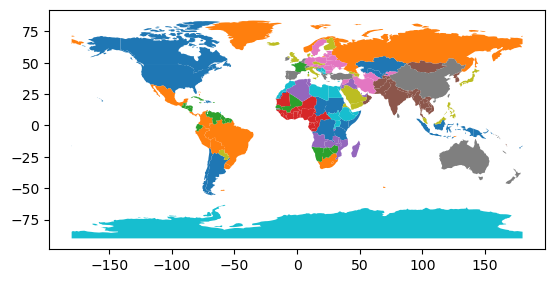

In [4]:
world.plot(cmap="tab10")

### 转换为大陆级别的数据集：

In [5]:
continents = world.dissolve(by='continent')
continents

,geometry
continent,
Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6..."
Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012..."
Asia,"MULTIPOLYGON (((48.67923 14.00320, 48.23895 13..."
Europe,"MULTIPOLYGON (((-53.55484 2.33490, -53.77852 2..."
North America,"MULTIPOLYGON (((-155.22217 19.23972, -155.5421..."
Oceania,"MULTIPOLYGON (((147.91405 -43.21152, 147.56456..."
Seven seas (open ocean),"POLYGON ((68.93500 -48.62500, 69.58000 -48.940..."
South America,"MULTIPOLYGON (((-68.63999 -55.58002, -69.23210..."


<AxesSubplot:>

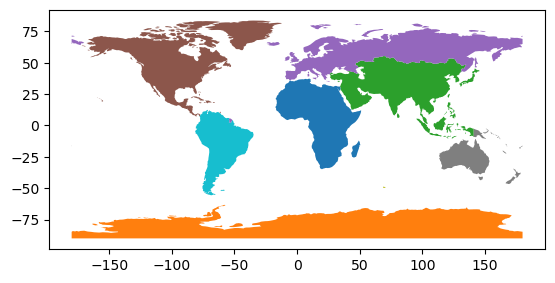

In [6]:
continents.plot(cmap="tab10")

# 2.aggfunc参数:

In [7]:
world = gpd.read_file('./datasets/naturalearth_lowres/naturalearth_lowres.shp')
world = world[['continent', 'geometry', 'pop_est']]
world

,continent,geometry,pop_est
0,Oceania,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",889953.0
1,Africa,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",58005463.0
2,Africa,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",603253.0
3,North America,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",37589262.0
4,North America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",328239523.0
...,...,...,...
171,Europe,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",6944975.0
172,Europe,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",622137.0
173,Europe,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",1794248.0
174,North America,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",1394973.0


## 聚合单列：

### 默认情况下，dissolve() 会将“first”传递给 groupby.aggregate。

In [8]:
continents = world.dissolve(by='continent')
continents

,geometry,pop_est
continent,,
Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...",58005463.0
Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012...",4490.0
Asia,"MULTIPOLYGON (((48.67923 14.00320, 48.23895 13...",18513930.0
Europe,"MULTIPOLYGON (((-53.55484 2.33490, -53.77852 2...",144373535.0
North America,"MULTIPOLYGON (((-155.22217 19.23972, -155.5421...",37589262.0
Oceania,"MULTIPOLYGON (((147.91405 -43.21152, 147.56456...",889953.0
Seven seas (open ocean),"POLYGON ((68.93500 -48.62500, 69.58000 -48.940...",140.0
South America,"MULTIPOLYGON (((-68.63999 -55.58002, -69.23210...",44938712.0


In [9]:
continents = world.dissolve(by='continent', aggfunc='sum')
continents

,geometry,pop_est
continent,,
Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...",1.306370e+09
Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012...",4.490000e+03
Asia,"MULTIPOLYGON (((48.67923 14.00320, 48.23895 13...",4.526709e+09
Europe,"MULTIPOLYGON (((-53.55484 2.33490, -53.77852 2...",7.454125e+08
North America,"MULTIPOLYGON (((-155.22217 19.23972, -155.5421...",5.837560e+08
Oceania,"MULTIPOLYGON (((147.91405 -43.21152, 147.56456...",4.120487e+07
Seven seas (open ocean),"POLYGON ((68.93500 -48.62500, 69.58000 -48.940...",1.400000e+02
South America,"MULTIPOLYGON (((-68.63999 -55.58002, -69.23210...",4.270667e+08


<AxesSubplot:>

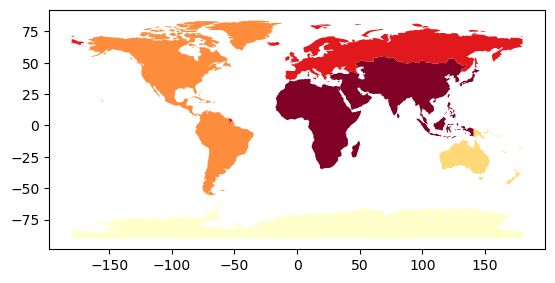

In [10]:
continents.plot(column = 'pop_est', scheme='quantiles', cmap='YlOrRd')

## 聚合多列或对一列采用多种聚合方法

### 例如，为了得到各大洲的国家数量，以及各大洲最大和最小的国家的人口，我们可以用’count’聚合’name’列，用’min’和’max’聚合’pop_est’列。

In [11]:
world = gpd.read_file('./datasets/naturalearth_lowres/naturalearth_lowres.shp')
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
171,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
172,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
173,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
174,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [12]:
continents = world.dissolve(by='continent' , aggfunc={"name":"count" , "pop_est":["min" , "max"]})
continents

,geometry,"(name, count)","(pop_est, min)","(pop_est, max)"
continent,,,,
Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...",51,603253.0,2.009636e+08
Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012...",1,4490.0,4.490000e+03
Asia,"MULTIPOLYGON (((48.67923 14.00320, 48.23895 13...",46,326000.0,1.397715e+09
Europe,"MULTIPOLYGON (((-53.55484 2.33490, -53.77852 2...",39,361313.0,1.443735e+08
North America,"MULTIPOLYGON (((-155.22217 19.23972, -155.5421...",18,56225.0,3.282395e+08
Oceania,"MULTIPOLYGON (((147.91405 -43.21152, 147.56456...",7,287800.0,2.536431e+07
Seven seas (open ocean),"POLYGON ((68.93500 -48.62500, 69.58000 -48.940...",1,140.0,1.400000e+02
South America,"MULTIPOLYGON (((-68.63999 -55.58002, -69.23210...",13,3398.0,2.110495e+08
